In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

# Import API keys
from api_keys import g_key
from api_keys import meteostat_api_key
# from api_keys import open_cage_api_key

gmaps.configure(api_key=g_key)

# Taxi Data
* Read CSV
* Ride volume by day
* Ride volume by Neighborhood
* Avg Ride volume by month



### Read CSV file

In [3]:
#importing Yellow Cab Taxi Ride data from .csv
# PULocationID = Pickup Location ID
# DOLocationID = Drop-off Location ID

# Contains the info for every taxi cab ride in New York City in January 2019

taxi_data = pd.read_csv("../resources/taxi_data/combined_months.csv")

# Contains each official Taxi Pickup Zone in NYC 

pickup_zone_data = pd.read_csv("../resources/taxi_data/nyc_pickup_zones.csv")
pickup_zone_data = pickup_zone_data.rename(columns={'OBJECTID': 'PULocationID'})

# Neighborhood Data

with open("../resources/taxi_data/neighborhoods.json") as json_data:
    neighborhood_data = json.load(json_data)
    


FileNotFoundError: [Errno 2] File ../resources/taxi_data/nyc_pickup_zones.csv does not exist: '../resources/taxi_data/nyc_pickup_zones.csv'

In [ ]:
# Setting up the Latitude and Longitude empty columns will pull these coordinates from Neighborhood Data
taxi_data['Latitude'] =""
taxi_data['Longitude'] =""

# Merging the 'taxi_data' and 'pickup_zone_data' on PULocationID (aka Zone ID)
# This is essentially grabbing the PULocationID from 'taxi_data' and finding it's name in 'pickup_zone_data'
merged_taxi_zones = pd.merge(taxi_data,pickup_zone_data, how='inner',on="PULocationID")



# Filtering the 'merged_taxi_zones' dataframe so it only include rides that happened in Manhattan
manhattan_taxi_zones = merged_taxi_zones[(merged_taxi_zones['borough']=='Manhattan')]


# counting the number of pickups in each pickup zone



#manhattan_taxi_zones.head(100)

# manhattan_taxi_zones['tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime'])

manhattan_taxi_zones.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(manhattan_taxi_zones['tpep_pickup_datetime']).dt.date

manhattan_taxi_zones.sort_values(by='tpep_pickup_datetime', ascending=False)


manhattan_taxi_zones

### Import Lat/Lng for each pickup zone


In [ ]:
#neighborhood_data['features'][0]['geometry']['coordinates']


# Returns neighborhood

# manhattan_taxi_zones.set_index("zone",inplace = True)

# manhattan_taxi_zones

# coords_list = []


# for index, column in manhattan_taxi_zones.iterrows():
#     neighbohood_name = neighborhood_data['features'][0]['properties']['name']
#     coords = neighborhood_data['features'][0]['geometry']['coordinates']
    
#     try:
#         coords_list.append(neighbohood_name)
#         print(f"Coords: {neighbohood_name}")
#     except:
#         coords_list.append("Not found, try changing name")
#     continue


    


### Ride Volume By Day


In [ ]:
ride_volume_per_day = manhattan_taxi_zones["tpep_pickup_datetime"].value_counts()
ride_volume_per_day_df = pd.DataFrame(ride_volume_per_day)
ride_volume_per_day_dfreset = ride_volume_per_day_df.reset_index()


# plt.figure(figsize=(16,3))
# ride_volume_per_day.plot.line()

ride_volume_per_day_dfrename = ride_volume_per_day_dfreset.rename(columns = {'index': 'Date', 'tpep_pickup_datetime': 'Ride Volume'})
ride_volume_per_day_dfrename.sort_values('Date').head(50)

### Ride Volume By Neighborhood


Text(0, 0.5, 'Neighbhorhood')

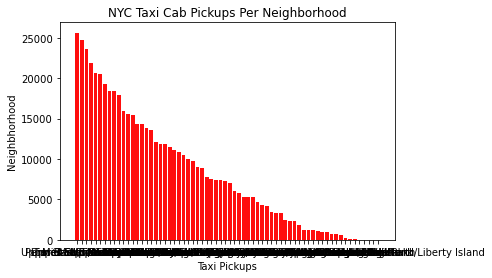

In [147]:
zone_count = manhattan_taxi_zones['zone'].value_counts()
neighborhood_count = pd.DataFrame(zone_count).reset_index()
neighborhood_count.columns = ['Neighborhood','Rides']

neighborhood_count

zone_count


x_axis = neighborhood_count['Neighborhood']
y_axis = neighborhood_count['Rides']


neighborhood_count
count_status = pd.value_counts(manhattan_taxi_zones['zone'])
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.95, align="center")
plt.title("NYC Taxi Cab Pickups Per Neighborhood")
plt.xlabel("Taxi Pickups")
plt.ylabel("Neighbhorhood")



### Avg Ride Volume by Month

In [202]:

ride_volume_per_day_dfrename['month'] = pd.DatetimeIndex(ride_volume_per_day_dfrename['Date']).month
avg_vol_month = round(ride_volume_per_day_dfrename.groupby(['month']).mean(),0)
avg_vol_month = avg_vol_month.rename(columns = {'Ride Volume': 'Avg Ride Volume'})
avg_vol_month

,Avg Ride Volume
month,
1,2921.0
2,3256.0
3,2937.0
4,3027.0
5,2923.0
6,3008.0


# Weather Data
* Top 10 Days for each Weather type (Rain, Snow, Tmax, Tmin, Wind)
* Create DF with all the days above removed (normal weather)
* Visuals to show above

In [203]:
# Read in the Weather CVS data
weather_path = "../resources/weather_data/ny_weather_0119-0619.csv"
weather_data = pd.read_csv(weather_path)
weather_data_cleaned = weather_data.drop(columns = ['Unnamed: 0', 'Avg Temp', 'Wind Direction', 'Wind Peak Gust', 'Air Pressure', 'Total Sun Duration'])



In [220]:
# Show 10 Lowest Min Temps
sort_min_temp = weather_data_cleaned.sort_values(by=['Min Temp'], ascending=True).reset_index(drop=True)
top_10_min_temp = sort_min_temp.head(10)

top_10_min_temp['Date'] = pd.to_datetime(top_10_min_temp.date).dt.date
min_temp_df = pd.DataFrame(top_10_min_temp[['Date','Min Temp']])

# Show 10 Highest Max Temps
sort_max_temp = weather_data_cleaned.sort_values(by=['Max Temp'], ascending=False).reset_index(drop=True)
top_10_max_temp = sort_max_temp.head(10)

top_10_max_temp['Date'] = pd.to_datetime(top_10_max_temp.date).dt.date
max_temp_df = pd.DataFrame(top_10_max_temp[['Date','Max Temp']])

# Show 10 Highest Rains
sort_rain = weather_data_cleaned.sort_values(by=['Precipitation'], ascending=False).reset_index(drop=True)
top_10_rain = sort_rain.head(10)

top_10_rain['Date'] = pd.to_datetime(top_10_rain.date).dt.date
max_rain_df = pd.DataFrame(top_10_rain[['Date','Precipitation']])

min_temp_df
max_temp_df
max_rain_df

C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\datavizZH\DViz_Programs\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Date,Precipitation
0,2019-05-05,38.9
1,2019-05-12,37.6
2,2019-01-20,27.2
3,2019-03-21,25.4
4,2019-04-15,25.4
5,2019-01-24,24.9
6,2019-02-20,21.6
7,2019-05-13,21.3
8,2019-02-12,20.6
9,2019-02-24,20.6


# Taxi Ride Volume vs Weather
* Ride volume for each day in each Top 10 weather types
* Average ride volume for "normal weather" days for each month
* Difference in Top 10 ride volumes vs "normal weather" ride volumes for the month that 


In [221]:
# Merge Min Temp and Ride Vol per day
min_temp_rides = pd.merge(min_temp_df,ride_volume_per_day_dfrename, how = 'left', on = 'Date')

# Merge Avg Ride volume by month
min_temp_rides_avg_month = pd.merge(min_temp_rides, avg_vol_month, how = 'left', on = 'month')
min_temp_rides_avg_month['% Change in Rides'] = 100 * (min_temp_rides_avg_month['Ride Volume'] - min_temp_rides_avg_month['Avg Ride Volume']) / min_temp_rides_avg_month['Avg Ride Volume']
# min_temp_rides_avg_month

# Merge Max Temp and Ride Vol per day
max_temp_rides = pd.merge(max_temp_df,ride_volume_per_day_dfrename, how = 'left', on = 'Date')

# Merge Avg Ride volume by month
max_temp_rides_avg_month = pd.merge(max_temp_rides, avg_vol_month, how = 'left', on = 'month')
max_temp_rides_avg_month['% Change in Rides'] = 100 * (max_temp_rides_avg_month['Ride Volume'] - max_temp_rides_avg_month['Avg Ride Volume']) / max_temp_rides_avg_month['Avg Ride Volume']
# max_temp_rides_avg_month

# Merge Min Temp and Ride Vol per day
max_rain_rides = pd.merge(max_rain_df,ride_volume_per_day_dfrename, how = 'left', on = 'Date')

# Merge Avg Ride volume by month
max_rain_rides_avg_month = pd.merge(max_rain_rides, avg_vol_month, how = 'left', on = 'month')
max_rain_rides_avg_month['% Change in Rides'] = 100 * (max_rain_rides_avg_month['Ride Volume'] - max_rain_rides_avg_month['Avg Ride Volume']) / max_rain_rides_avg_month['Avg Ride Volume']
max_rain_rides_avg_month

,Date,Precipitation,Ride Volume,month,Avg Ride Volume,% Change in Rides
0,2019-05-05,38.9,2767,5,2923.0,-5.336983
1,2019-05-12,37.6,2661,5,2923.0,-8.963394
2,2019-01-20,27.2,2414,1,2921.0,-17.357069
3,2019-03-21,25.4,3242,3,2937.0,10.384746
4,2019-04-15,25.4,2985,4,3027.0,-1.387512
5,2019-01-24,24.9,3431,1,2921.0,17.459774
6,2019-02-20,21.6,3183,2,3256.0,-2.242015
7,2019-05-13,21.3,2877,5,2923.0,-1.573726
8,2019-02-12,20.6,3036,2,3256.0,-6.756757
9,2019-02-24,20.6,2654,2,3256.0,-18.488943


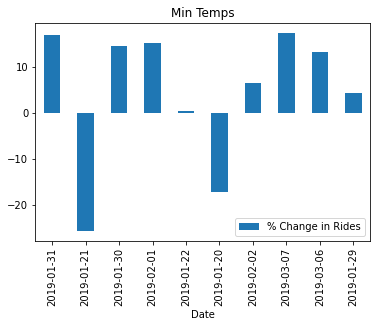

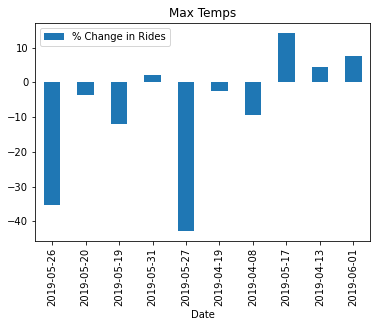

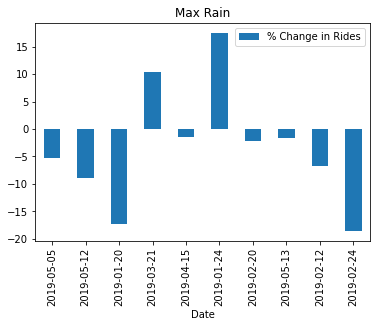

In [225]:
min_temp_rides_avg_month.plot.bar(x = 'Date', y = '% Change in Rides', title = 'Min Temps')
max_temp_rides_avg_month.plot.bar(x = 'Date', y = '% Change in Rides', title = 'Max Temps')
max_rain_rides_avg_month.plot.bar(x = 'Date', y = '% Change in Rides', title = 'Max Rain')

## Comments about the above...
#### Ride Volume Change for Min Temp
* The days that we see a negative decline (1/21 & 1/20) are more than likely due to Martin Luther King Jr. holiday and being a Sunday
* We might need to filter out weekends (Sat and/or Sun) if we find that they are contradicting week days

#### Ride Volume Change for Max Temp
* Same as min temp, we also see the a holiday in the top 10. The sunday before and day of Memorial Day we see drastic declines from the average ride volume
* Seeing more and more reason to remove weekends